# 실습 과제 6장 - K-means 실습 과제

### wine 데이터셋을 활용하여 K-means를 수행
##### (["alcohol", "total_phenols"] feature 사용)

In [1]:
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = load_wine(as_frame=True)

In [3]:
df = dataset.frame
# 데이터 프레임의 "class" 칼럼을 추가
df["class"] = dataset.target

In [4]:
# 사용할 "alcohol"과 "total_phenols" 칼럼만 추출해서 확인
df[["alcohol","total_phenols"]]

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80
...,...,...
173,13.71,1.68
174,13.40,1.80
175,13.27,1.59
176,13.17,1.65


In [5]:
# 데이터 프레임 칼럼 확인
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'class'],
      dtype='object')

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='alcohol', ylabel='total_phenols'>

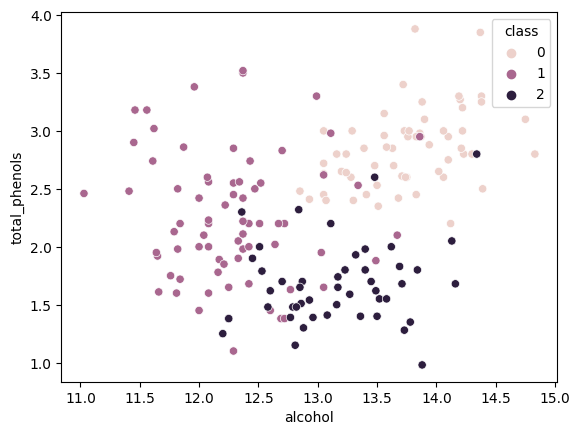

In [6]:
# alcohol, total_phenols, class 칼럼만 추출해 산점도 그리기
sns.scatterplot(data=df, x='alcohol', y='total_phenols', hue='class')

### wine 데이터셋을 활용하여 K-means를 수행
##### (["alcohol", "total_phenols"] feature 사용)

In [13]:
from sklearn.cluster import KMeans

# 사용할 특성을 선택
X = df[["alcohol", "total_phenols"]]

### 1. Elbow point를 시각화하시오.

In [8]:
# K-means clustering에서 최적의 클러스터 개수를 찾기 위해 Elbow Method를 사용한다.
# Elbow Method는 클러스터 개수(k)를 x축으로, inertia(군집 내 오차 제곱합)를 y축으로 그래프를 그린다.
# 그래프에서 급격한 기울기가 끝나는 지점이 최적의 클러스터 개수이다.
# 이를 위해 k를 1부터 10까지 변화시키면서 inertia를 계산하고, distortions 리스트에 추가한다.
# 이후 distortions 리스트를 시각화하여 최적의 k를 찾는다.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

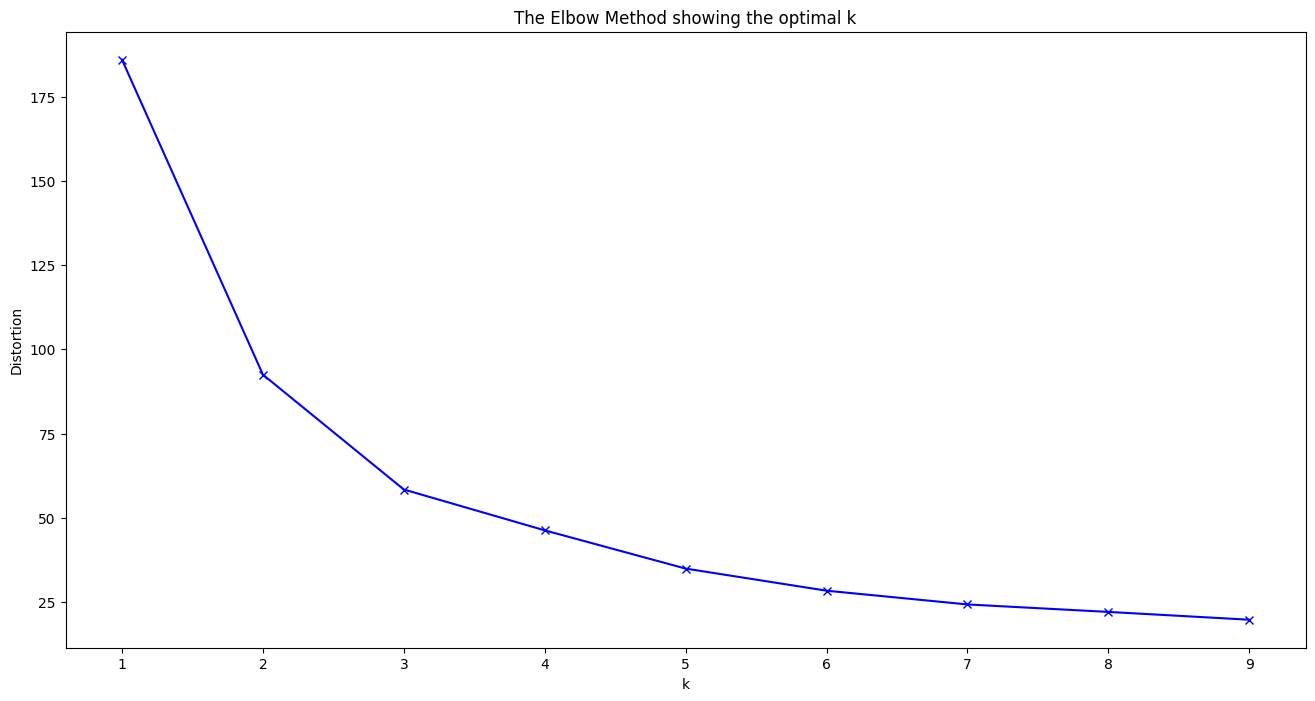

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

<Axes: xlabel='alcohol', ylabel='total_phenols'>

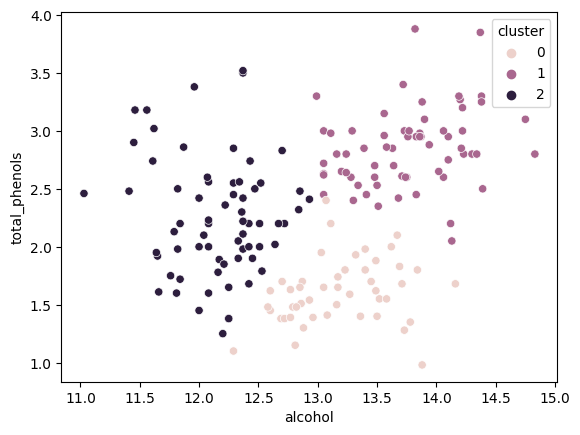

In [9]:
# 엘보우 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 최적의 클러스터 수를 사용하여 K-means clustering을 수행
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# 데이터프레임에 클러스터 정보를 추가
df["cluster"] = kmeans.labels_

# 클러스터 그리기
sns.scatterplot(data=df, x='alcohol', y='total_phenols', hue='cluster')


### 2. silhouette diagram을 시각화하시오.

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

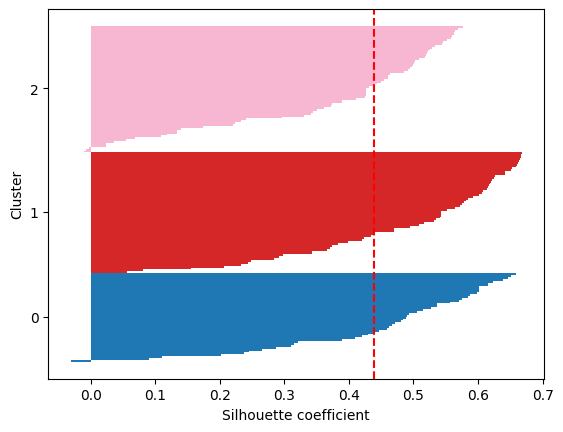

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# 각 샘플에 대한 실루엣 점수 계산
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# 전체 데이터셋에 대한 평균 실루엣 점수 계산
silhouette_avg = silhouette_score(X, kmeans.labels_)

# 실루엣 다이어그램 그리기
import matplotlib.pyplot as plt

y_lower, y_upper = 0, 0
yticks = []
for i, cluster in enumerate(np.unique(kmeans.labels_)):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.tab20(i / len(np.unique(kmeans.labels_)))
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, np.unique(kmeans.labels_))
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()


### 3. 해당 결과를 토대로 optimal k를 제시하시오.

엘보우 그래프에서 최적의 k가 3임을 확인할 수 있습니다.
실루엣 다이어그램에서도 확인되는데, 평균 실루엣 점수가 k=3일 때 가장 높습니다.
따라서 최적의 k는 3이라고 결론지을 수 있습니다.